<a href="https://colab.research.google.com/github/HastiSoudbakhsh/CO2-Emission-and-Energy-Consumption/blob/main/prediction_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))

In [ ]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'New_Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
## CO2 emission

In [ ]:
## fourth splitting approach

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split
a = data.copy()
target = 'Value_co2_emissions_kt_by_country'
result_dict = {}

unique_countries = a['Entity'].unique()
for country in unique_countries:
    country_data = a[a['Entity'] == country]
    # Split data into predictors (X) and target (y)
    Corr_Matrix= country_data.corr()
    t_df = Corr_Matrix['Value_co2_emissions_kt_by_country'].sort_values(ascending=False).to_frame().reset_index()
    features = t_df[abs(t_df['Value_co2_emissions_kt_by_country']) > 0.4]['index'].to_list()

    X = country_data[features]
    y = country_data[target]
    # Split the data into training and testing sets for each country
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_co2 = GradientBoostingRegressor(random_state=42)
    model_co2.fit(X_train, y_train)
    y_pred_gb = model_co2.predict(X_test)

    split_data = {
        'country': country,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
    }
    result_dict[country] = split_data

In [ ]:
result_dict['China']

In [ ]:
## in code vase neshun dadane 5 sale ayande hich kari nemikone, predict e model ro vase dadehaye mojud neshun mide, na 5 sale ayande.

<ipython-input-26-8b9ac3c9adae>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix= china_data.corr()


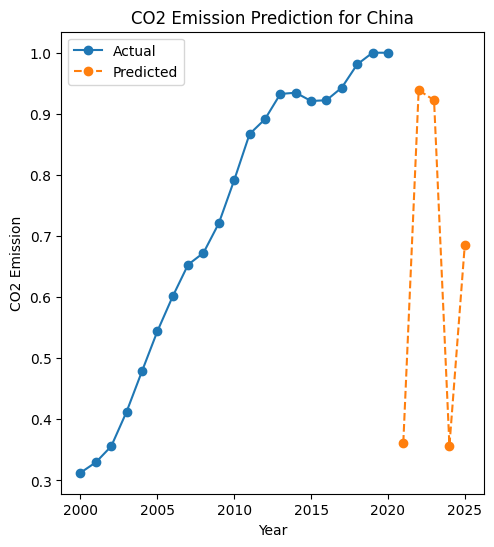

In [ ]:
from sklearn.model_selection import train_test_split
a = data.copy()

target = 'Value_co2_emissions_kt_by_country'

china_data = a[a['Entity'] == 'China']

    # Split data into predictors (X) and target (y)
Corr_Matrix= china_data.corr()
t_df = Corr_Matrix['Value_co2_emissions_kt_by_country'].sort_values(ascending=False).to_frame().reset_index()
features = t_df[abs(t_df['Value_co2_emissions_kt_by_country']) > 0.4]['index'].to_list()

X = china_data[features]
y = china_data[target]

    # Split the data into training and testing sets for each country
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_co2 = GradientBoostingRegressor(random_state=42)
model_co2.fit(X_train, y_train)
y_pred_gb = model_co2.predict(X_test)

##########################
future_years = np.array(range(2021, 2026)).reshape(-1, 1)
X1= china_data[future_years]
y1= china_data[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1=GradientBoostingRegressor(random_state=42)
model1.fit(X1_train, y1_train)
y1_pred_gb = model1.predict(X_test)

##########################

import matplotlib.pyplot as plt

#future_years = np.array(range(2021, 2026)).reshape(-1, 1)
#predicted_co2 = model_co2.predict(future_years)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], china_data['Value_co2_emissions_kt_by_country'], label='Actual', marker='o')
plt.plot(future_years, y1_pred_gb, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

target = 'Value_co2_emissions_kt_by_country'

# Assume the 'china_data' DataFrame is already loaded with the relevant data
china_data = a[a['Entity'] == 'China']


Corr_Matrix= china_data.corr()
t_df = Corr_Matrix['Value_co2_emissions_kt_by_country'].sort_values(ascending=False).to_frame().reset_index()
features = t_df[abs(t_df['Value_co2_emissions_kt_by_country']) > 0.4]['index'].to_list()

#########
X = china_data[features]
y = china_data[target]

    # Split the data into training and testing sets for each country
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_co2 = GradientBoostingRegressor(random_state=42)
model_co2.fit(X_train, y_train)
y_pred_gb = model_co2.predict(X_test)

#######

# Create a DataFrame for the future years

future_years = np.array(range(2021, 2026)).reshape(-1, 1) ### for each feature
future_data = china_data[features].copy()
future_data['Year'] = future_years.flatten()


# Use the trained model to predict CO2 emissions for the future years
future_predictions = model_co2.predict(future_data[features])

# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual data
plt.scatter(china_data['Year'], china_data[target], label='Actual', color='blue', marker='o')

# Plotting predicted data for the future years
plt.plot(future_years.flatten(), future_predictions, label='Predicted', linestyle='--', color='red', marker='o')

plt.title('CO2 Emission Prediction for China (2021-2025)')
plt.xlabel('Year')
plt.ylabel('CO2 Emission (kt)')
plt.legend()
plt.show()

<ipython-input-32-fa775a008159>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix= china_data.corr()


KeyError: "['Value_co2_emissions_kt_by_country', 'Primary energy consumption per capita (kWh/person)', 'Access to electricity (% of population)', 'Electricity from fossil fuels (TWh)', 'gdp_per_capita', 'Access to clean fuels for cooking', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)', 'Low-carbon electricity (% electricity)', 'gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] not in index"

In [ ]:
####### future_years = np.array(range(2021, 2026)).reshape(-1, 1)
####### X1= china_data[future_years]
####### y1= china_data[target]
####### X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

####### model1=GradientBoostingRegressor(random_state=42)
####### model.fit(X1_train, y1_train)
####### y1_pred_gb = model1.predict(X_test)
####### plt.plot(future_years, y1_pred_gb, label='Predicted', marker='o', linestyle='--')
####### plt.title('CO2 Emission Prediction for China')
####### plt.xlabel('Year')
####### plt.ylabel('CO2 Emission')
####### plt.legend()
####### plt.show()

In [ ]:
Corr_Matrix= data.corr()
t_df = Corr_Matrix['Primary energy consumption per capita (kWh/person)'].sort_values(ascending=False).to_frame().reset_index()
t_df

In [ ]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'New_Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

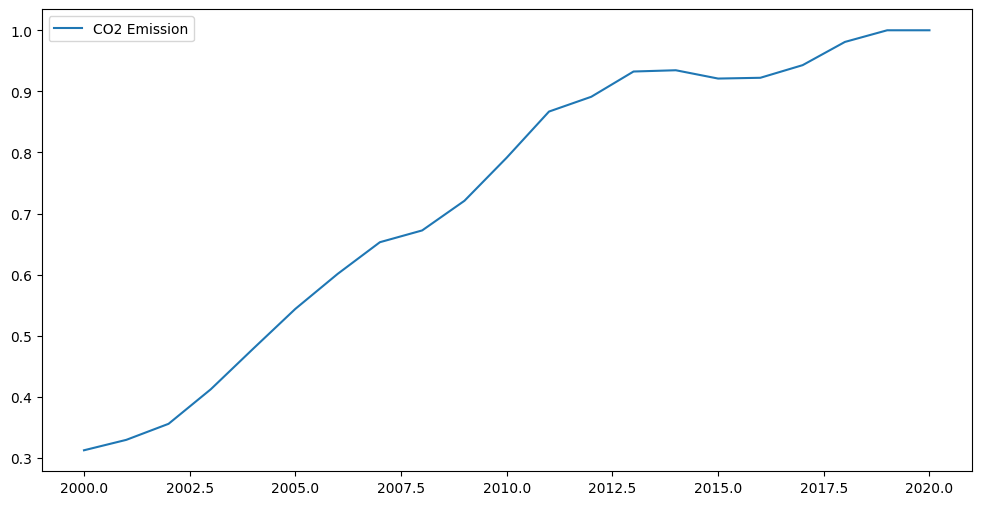

In [ ]:
country_data = data[data['Entity'] == 'China']

plt.figure(figsize=(12, 6))
plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label='CO2 Emission')
plt.legend()
plt.show()

In [ ]:
pip install statsmodels

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))

In [ ]:
features = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)', 'Land Area(Km2)']

for feature in features:
    # Choose the appropriate column from the dataset
    df = data[['Year', feature]]

    # Use auto_arima to find the best parameters
    model = auto_arima(df[feature], seasonal=False, trace=True)
    order = model.get_params()['order']

    # Fit the ARIMA model
    arima_model = ARIMA(df[feature], order=order)
    fit_model = arima_model.fit()

    # Forecast future values for the next 5 years (2021 to 2025)
    forecast_steps = 5
    forecast = fit_model.get_forecast(steps=forecast_steps)

    # Get the forecasted values
    forecast_values = forecast.predicted_mean

    # Print or use the forecast_values as needed
    print(f'Forecasted values for {feature} from 2021 to 2025:')
    print(forecast_values)

In [ ]:
# the above code for selected countries are as follows:

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

countries = ['China', 'United States', 'India']
features = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
            'Electricity from nuclear (TWh)', 'Land Area(Km2)']

for country in countries:
    print(f"\nForecasted values for {country} from 2021 to 2025:")

    for feature in features:
        # Filter the data for the current country and feature
        df = data[(data['Entity'] == country)][['Year', feature]]

        # Use auto_arima to find the best parameters
        model = auto_arima(df[feature], seasonal=False, trace=True)
        order = model.get_params()['order']

        # Fit the ARIMA model
        arima_model = ARIMA(df[feature], order=order)
        fit_model = arima_model.fit()

        # Forecast future values for the next 5 years (2021 to 2025)
        forecast_steps = 5
        forecast = fit_model.get_forecast(steps=forecast_steps)

        # Get the forecasted values
        forecast_values = forecast.predicted_mean

        # Print or use the forecast_values as needed
        print(f'{feature}:')
        print(forecast_values)


Forecasted values for China from 2021 to 2025:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-79.750, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-83.761, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-81.834, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-81.917, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-63.011, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80.190, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.645 seconds
Electricity from fossil fuels (TWh):
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
Name: predicted_mean, dtype: float64
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-85.490, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-63.852, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-83.105, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-65.763, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-87.340, Time=0.34 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-89.002, Time=0.50 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-87.043, Time=0.52 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-81.739, Time=0.40 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-82.003, Time=0.34 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 3.095 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Electricity from renewables (TWh):
21    1.080097
22    1.158690
23    1.238349
24    1.317253
25    1.396692
Name: predicted_mean, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-101.732, Time=0.74 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-105.240, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-103.315, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-103.799, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-107.119, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-102.365, Time=0.34 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.529 seconds
Electricity from nuclear (TWh):
21    0.474049
22    0.495670
23    0.517290
24    0.538911
25    0.560532
Name: predicted_mean, dtype: float64
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.932, Time=0.04 sec
Total fit time: 0.050 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Land Area(Km2):
21    0.961165
22    0.961165
23    0.961165
24    0.961165
25    0.961165
Name: predicted_mean, dtype: float64

Forecasted values for United States from 2021 to 2025:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34.942, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-98.391, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-95.941, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-96.732, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-102.714, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-99.056, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-104.637, Time=0.07 sec
 ARIMA(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-91.540, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-83.452, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-88.283, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-96.111, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-85.130, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-96.847, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-96.376, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-92.908, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-102.293, Time=0.20 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-91.110, Time=0.39 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-99.316, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-95.234, Time=0.12 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 2.231 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Electricity from renewables (TWh):
21    0.396333
22    0.417904
23    0.439474
24    0.461045
25    0.482615
Name: predicted_mean, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-103.716, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-104.613, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-103.772, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-104.389, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-106.231, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-103.197, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.736 seconds
Electricity from nuclear (TWh):
21    0.975871
22    0.975871
23    0.975871
24    0.975871
25    0.975871
Name: predicted_mean, dtype: float64
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=60.955, Time=0.02 sec
Total fit time: 0.021 seconds
Land Area(Km2):
21    0.984857
22    0.984857
23    0.984857
24    0.984857
25    0.984857
Name: pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-134.003, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-139.485, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-140.621, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-139.610, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-126.683, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-138.702, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-138.698, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-136.935, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-141.032, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-139.811, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-139.569, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-132.933, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-138.196, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.438 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Electricity from fossil fuels (TWh):
21    0.220984
22    0.212272
23    0.205335
24    0.199811
25    0.195414
Name: predicted_mean, dtype: float64
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-139.921, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-137.927, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-137.927, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-131.764, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-135.926, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.865 seconds
Electricity from renewables (TWh):
21    0.144517
22    0.144517
23    0.144517
24    0.144517
25    0.144517
Name: predicted_mean, dtype: float64
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-156.714, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-163.073, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-161.529, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-161.779, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-160.930, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-159.891, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.677 seconds
Electricity from nuclear (TWh):
21    0.055114
22    0.055114
23    0.055114
24    0.055114
25    0.055114
Name: predicted_mean, dtype: float64
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.933, Time=0.02 sec
Total fit time: 0.025 seconds
Land Area(Km2):
21    0.329225
22    0.329225
23    0.329225
24    0.329225
25    0.329225
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

In [ ]:
# predicted features's values for China with ARIMA

In [ ]:
import pandas as pd

data_co2_china = {
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Entity': ['China', 'China', 'China', 'China', 'China'],
    'Electricity from fossil fuels (TWh)': [1.0, 1.0, 1.0, 1.0, 1.0],
    'Electricity from renewables (TWh)': [1.080097, 1.158690, 1.238349, 1.317253, 1.396692],
    'Electricity from nuclear (TWh)': [0.474049, 0.495670, 0.517290, 0.538911, 0.560532],
    'Land Area(Km2)': [0.961165, 0.961165, 0.961165, 0.961165, 0.961165],
    'Value_co2_emissions_kt_by_country': [None, None, None, None, None]
}

df_co2_china = pd.DataFrame(data_co2_china)
df_co2_china

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Electricity from nuclear (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country
0,2021,China,1.0,1.080097,0.474049,0.961165,None
1,2022,China,1.0,1.158690,0.495670,0.961165,None
2,2023,China,1.0,1.238349,0.517290,0.961165,None
3,2024,China,1.0,1.317253,0.538911,0.961165,None
4,2025,China,1.0,1.396692,0.560532,0.961165,None


In [ ]:
# predicted features for United state with ARIMA

In [ ]:
import pandas as pd

data_co2_us = {
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Entity': ['United States', 'United States', 'United States', 'United States', 'United States'],
    'Electricity from fossil fuels (TWh)': [0.479393, 0.487603, 0.494154, 0.499382, 0.503554],
    'Electricity from renewables (TWh)': [0.396333, 0.417904, 0.439474, 0.461045, 0.482615],
    'Electricity from nuclear (TWh)': [0.975871, 0.975871, 0.975871, 0.975871, 0.975871],
    'Land Area(Km2)': [0.984857, 0.984857, 0.984857, 0.984857, 0.984857],
    'Value_co2_emissions_kt_by_country': [None, None, None, None, None]
}

df_co2_us = pd.DataFrame(data_co2_us)
df_co2_us

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Electricity from nuclear (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country
0,2021,United States,0.479393,0.396333,0.975871,0.984857,None
1,2022,United States,0.487603,0.417904,0.975871,0.984857,None
2,2023,United States,0.494154,0.439474,0.975871,0.984857,None
3,2024,United States,0.499382,0.461045,0.975871,0.984857,None
4,2025,United States,0.503554,0.482615,0.975871,0.984857,None


In [ ]:
# predicted features for India with ARIMA

In [ ]:
import pandas as pd

data_co2_india = {
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Entity': ['India', 'India', 'India', 'India', 'India'],
    'Electricity from fossil fuels (TWh)': [0.220984, 0.212272, 0.205335, 0.199811, 0.195414],
    'Electricity from renewables (TWh)': [0.144517, 0.144517, 0.144517, 0.144517, 0.144517],
    'Electricity from nuclear (TWh)': [0.055114, 0.055114, 0.055114, 0.055114, 0.055114],
    'Land Area(Km2)': [0.329225, 0.329225, 0.329225, 0.329225, 0.329225],
    'Value_co2_emissions_kt_by_country': [None, None, None, None, None]
}

df_co2_india = pd.DataFrame(data_co2_india)
df_co2_india

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Electricity from nuclear (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country
0,2021,India,0.220984,0.144517,0.055114,0.329225,None
1,2022,India,0.212272,0.144517,0.055114,0.329225,None
2,2023,India,0.205335,0.144517,0.055114,0.329225,None
3,2024,India,0.199811,0.144517,0.055114,0.329225,None
4,2025,India,0.195414,0.144517,0.055114,0.329225,None


In [ ]:
# combine this 3 dataframe countries

In [ ]:
combined_df = pd.concat([df_co2_china, df_co2_us, df_co2_india], axis=0, ignore_index=True)
combined_df

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Electricity from nuclear (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country
0,2021,China,1.000000,1.080097,0.474049,0.961165,None
1,2022,China,1.000000,1.158690,0.495670,0.961165,None
2,2023,China,1.000000,1.238349,0.517290,0.961165,None
3,2024,China,1.000000,1.317253,0.538911,0.961165,None
4,2025,China,1.000000,1.396692,0.560532,0.961165,None
5,2021,United States,0.479393,0.396333,0.975871,0.984857,None
6,2022,United States,0.487603,0.417904,0.975871,0.984857,None
7,2023,United States,0.494154,0.439474,0.975871,0.984857,None
8,2024,United States,0.499382,0.461045,0.975871,0.984857,None
9,2025,United States,0.503554,0.482615,0.975871,0.984857,None


In [ ]:
# this feature prediction is in general and it is not belong to specific country

In [ ]:
import pandas as pd

data_co2 = {
    'Year': [2021, 2022, 2023, 2024, 2025],
    'Electricity from fossil fuels (TWh)': [0.001867, 0.003068, 0.004253, 0.005416, 0.006553],
    'Electricity from renewables (TWh)': [0.002691, 0.003399, 0.004045, 0.004637, 0.005177],
    'Electricity from nuclear (TWh)': [0.001049, 0.001706, 0.002521, 0.003292, 0.004021],
    'Land Area(Km2)': [0.039134, 0.039134, 0.039134, 0.039134, 0.039134],
    'Value_co2_emissions_kt_by_country': [None, None, None, None, None]
}

df_co2 = pd.DataFrame(data_co2)
print(df_co2)

In [ ]:
# combine the new and olddata set for selected features and countries

In [ ]:
#selected_columns = ['Year', 'Entity' 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)', 'Land Area(Km2)', 'Value_co2_emissions_kt_by_country']
#data_co2_features = data[selected_columns]

#combined_data_co2= pd.concat([data_co2_features , combined_df], axis=0)
#print(combined_data_co2)


# Filter data_co2_features for China, United States, and India
selected_countries = ['China', 'United States', 'India']
filtered_data_co2_features = data[data['Entity'].isin(selected_countries)]

# Select specific columns from the filtered DataFrame
selected_columns = ['Year', 'Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
                    'Electricity from nuclear (TWh)', 'Land Area(Km2)', 'Value_co2_emissions_kt_by_country']
filtered_data_co2_features = filtered_data_co2_features[selected_columns]

# Concatenate the filtered DataFrame with the combined_df DataFrame
combined_data_co2 = pd.concat([filtered_data_co2_features, combined_df], axis=0, ignore_index=True)

# Display the combined DataFrame
combined_data_co2

,Year,Entity,Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Electricity from nuclear (TWh),Land Area(Km2),Value_co2_emissions_kt_by_country
0,2000,China,0.214752,0.103234,0.020682,0.961169,0.312604
1,2001,China,0.228117,0.128484,0.021584,0.961169,0.329652
2,2002,China,0.257991,0.133372,0.031047,0.961169,0.355892
3,2003,China,0.304769,0.131482,0.053545,0.961169,0.412471
4,2004,China,0.346328,0.163588,0.062354,0.961169,0.478674
...,...,...,...,...,...,...,...
73,2021,India,0.220984,0.144517,0.055114,0.329225,NaN
74,2022,India,0.212272,0.144517,0.055114,0.329225,NaN
75,2023,India,0.205335,0.144517,0.055114,0.329225,NaN
76,2024,India,0.199811,0.144517,0.055114,0.329225,NaN


In [ ]:
# prediction of co2 with combined_data_co2

In [ ]:
from sklearn.model_selection import train_test_split

a = combined_data_co2.copy()
#c= data.copy()
target = 'Value_co2_emissions_kt_by_country'
china_data = a[a['Entity'] == 'China']
features = ['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)', 'Land Area(Km2)']

    # Split data into predictors (X) and target (y)

#X = china_data[features]
#y = china_data[target]

    # Split the data into training and testing sets for each country
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#model_co2 = GradientBoostingRegressor(random_state=42)
#model_co2.fit(X_train, y_train)
#y_pred_gb = model_co2.predict(X_test)

##########################

future_years = np.array(range(2021, 2026)).reshape(-1, 1)
X1= china_data[future_years]
y1= china_data[target]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1=GradientBoostingRegressor(random_state=42)
model1.fit(X1_train, y1_train)
y1_pred_gb = model1.predict(X_test)

##########################

import matplotlib.pyplot as plt

#future_years = np.array(range(2021, 2026)).reshape(-1, 1)
#predicted_co2 = model_co2.predict(future_years)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], china_data['Value_co2_emissions_kt_by_country'], label='Actual', marker='o')
plt.plot(future_years, y1_pred_gb, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.show()

KeyError: "None of [Index([(2021,), (2022,), (2023,), (2024,), (2025,)], dtype='object')] are in the [columns]"

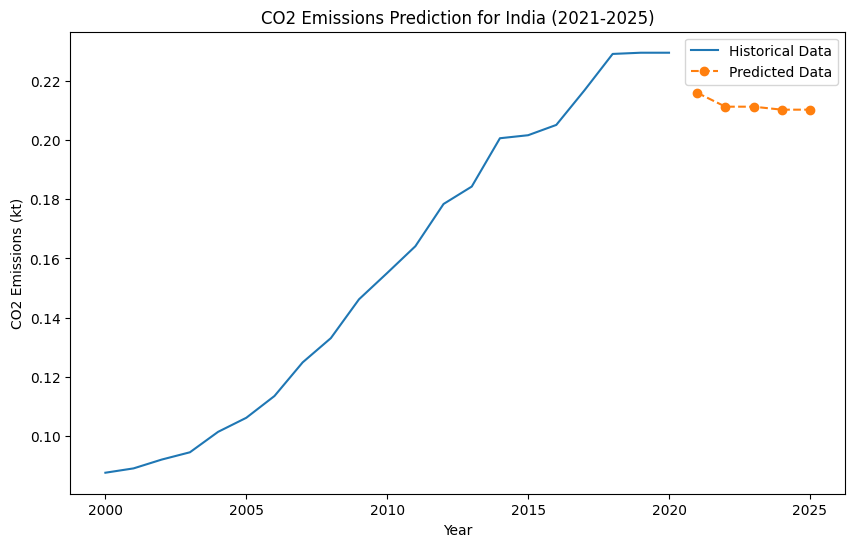

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

#  combined_data_co2 is my DataFrame
a = combined_data_co2.copy()

china_data = a[a['Entity'] == 'India']
features = [ 'Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)',
            'Electricity from nuclear (TWh)', 'Land Area(Km2)']
target = 'Value_co2_emissions_kt_by_country'

# Training data
train_data = china_data[china_data['Year'] < 2021]
X_train = train_data[features]
y_train = train_data[target]

# Testing data (years 2021 to 2025)
test_data = china_data[china_data['Year'] >= 2021]
X_test = test_data[features]

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict CO2 emissions for the years 2021 to 2025
predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(train_data['Year'], train_data[target], label='Historical Data')
plt.plot(test_data['Year'], predictions, label='Predicted Data', linestyle='--', marker='o')
plt.title('CO2 Emissions Prediction for India (2021-2025)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.show()


In [ ]:
# creating a new predicted dataframe

In [ ]:
# for energy consumption

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))

In [ ]:
# Specify the correct column names for features
features = ['gdp_growth', 'Access to clean fuels for cooking', 'Access to electricity (% of population)', 'Renewable energy share in the total final energy consumption (%)', 'Latitude' ]

# Create a new DataFrame for predictions
predictions_df_energy = pd.DataFrame()

# Add the 'year' column for the years 2021 to 2025
predictions_df_energy['Year'] = range(2021, 2026)

# Iterate through each feature
for feature in features:
    # Choose the appropriate column from the dataset
    df = data[['Year', feature]]

    # Use auto_arima to find the best parameters
    model = auto_arima(df[feature], seasonal=False, trace=True)
    order = model.get_params()['order']

    # Fit the ARIMA model
    arima_model = ARIMA(df[feature], order=order)
    fit_model = arima_model.fit()

    # Forecast future values for the next 5 years (2021 to 2025)
    forecast_steps = 5
    forecast_values = fit_model.get_forecast(steps=forecast_steps).predicted_mean

    # Add the forecasted values to the predictions DataFrame
    predictions_df_energy[feature] = forecast_values

# Add an empty column for CO2 emissions
predictions_df_energy['Primary energy consumption per capita (kWh/person)'] = None

# Display the predictions DataFrame
print(predictions_df_energy)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-15311.728, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2792.219, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1559.716, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-15332.716, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-4476.645, Time=0.77 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-15303.025, Time=0.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-15348.083, Time=1.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-6457.867, Time=0.92 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-15337.963, Time=1.41 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-15368.590, Time=3.23 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-7836.483, Time=1.64 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=4.57 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-15410.742, Time=2.25 sec
 ARIMA(0,0,5)(0,0,0)[0]  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5636.485, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8231.971, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5642.182, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3943.555, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5640.322, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5640.321, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-5638.205, Time=1.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5697.628, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3365.173, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-5697.428, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5697.349, Time=0.62 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-286.435, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-5693.903, Time=3.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 9.333 seconds
Performing st

In [ ]:
features_to_predict = ['Feature1', 'Feature2', 'Feature3']

# Replace 'China' with the desired country
country_data = df[df['Entity'] == 'China']

# Create separate models for each feature
for feature in features_to_predict:
    # Split data into predictors (X) and target (y)
    X = country_data[['Year']]  # Add other relevant features here
    y = country_data[feature]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Gradient Boosting Regressor model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Generate future years (2021-2025)
    future_years = np.array(range(2021, 2026)).reshape(-1, 1)

    # Make predictions for future years
    predicted_values = model.predict(future_years)

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(X['Year'], y, label='Actual', marker='o')
    plt.plot(X_test['Year'], model.predict(X_test), label='Predicted (Testing)', marker='o', linestyle='--')
    plt.plot(future_years, predicted_values, label='Predicted (Future)', marker='o', linestyle='--')
    plt.title(f'{feature} Prediction for China')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [ ]:
###prediction

In [ ]:
import matplotlib.pyplot as plt

future_years = np.array(range(2021, 2026)).reshape(-1, 1)
predicted_co2 = model_co2.predict(future_years)

china_data = a[a['Entity'] == 'China']
plt.figure(figsize=(12, 6))

# Plotting CO2 emission
plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], china_data['Value_co2_emissions_kt_by_country'], label='Actual', marker='o')
plt.plot(future_years, predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but GradientBoostingRegressor is expecting 7 features as input.

In [ ]:
# 6. Prediction
future_years = np.array(range(2021, 2026)).reshape(-1, 1)
predictions = model_co2.predict(future_years)



# 8. Visualization (Optional)
import matplotlib.pyplot as plt

plt.scatter(df['Year'], df['Value'], color='blue', label='Actual')
plt.scatter(future_years, predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Year vs Value')
plt.legend()
plt.show()

In [ ]:
#########################################################

In [ ]:
## energy consumption

In [ ]:
## First approach splitting

In [ ]:
data.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'New_Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

b = data.copy()
target1 = 'Primary energy consumption per capita (kWh/person)'
features1 = ['gdp_per_capita', 'Access to clean fuels for cooking', 'Access to electricity (% of population)',
             'Renewable energy share in the total final energy consumption (%)', 'Latitude']

split_data_list = []

unique_countries = b['Entity'].unique()
for country in unique_countries:
    # Subset data for the current country
    country_data = b[b['Entity'] == country]
    # Split data into predictors (X) and target (y)
    X = country_data[features1]
    y = country_data[target1]
    # Split the data into training and testing sets for each country
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    # Store the splits in a dictionary
    split_data = {
        'country': country,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

    split_data_list.append(split_data)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

# Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual energy consumption'] = y_test
    submit['Predict_energy_consumption'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.94
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
   index  Actual energy consumption  Predict_energy_consumption
0   3619                   0.018735                    0.019632
1   3636                   0.011684                    0.012320
2   3634                   0.014703                    0.015196
----------------------------------------
Random Forest:
R2 Score: 0.86
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
   index  Actual energy consumption  Predict_energy_consumption
0   3619                   0.018735                    0.017323
1   3636                   0.011684                    0.012882
2   3634                   0.014703                    0.014793
----------------------------------------
Gradient Boosting:
R2 Score: 0.91
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
   index  Actual energy consumption  Predict_energy_consumption
0   3619                   0.018735  

In [ ]:
### prediction

In [ ]:
# energy consumption and  LinearRegression()

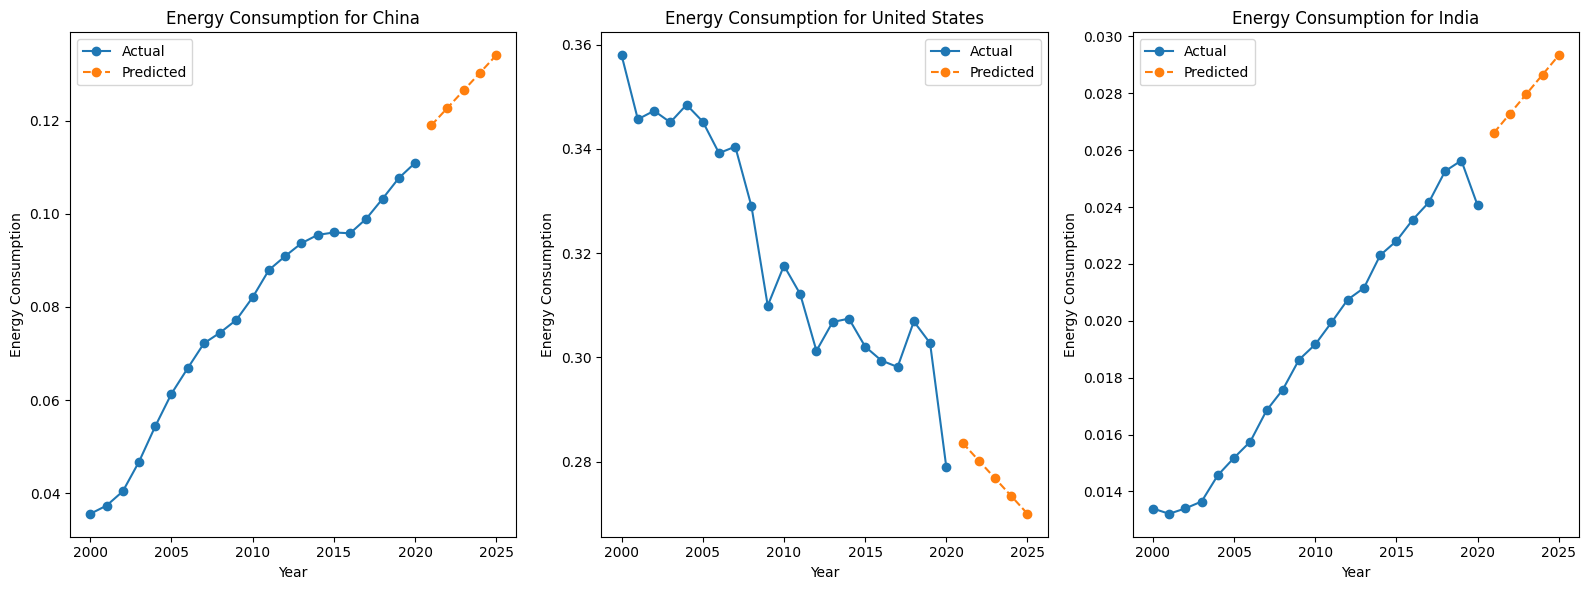

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

countries = ['China','United States', 'India']

plt.figure(figsize=(16, 6))

for i, country in enumerate(countries, 1):
    country_data = b[b['Entity'] == country]

    X = country_data[['Year']]
    y_energy = country_data['Primary energy consumption per capita (kWh/person)']

    model_energy = LinearRegression().fit(X, y_energy)

    future_years = pd.DataFrame({'Year': range(2021, 2026)})
    predicted_energy = model_energy.predict(future_years[['Year']])

    plt.subplot(1, len(countries), i)
    plt.plot(country_data['Year'], y_energy, label='Actual', marker='o')
    plt.plot(future_years['Year'], predicted_energy, label='Predicted', marker='o', linestyle='--')
    plt.title(f'Energy Consumption for {country}')
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    plt.legend()

plt.tight_layout()
plt.show()

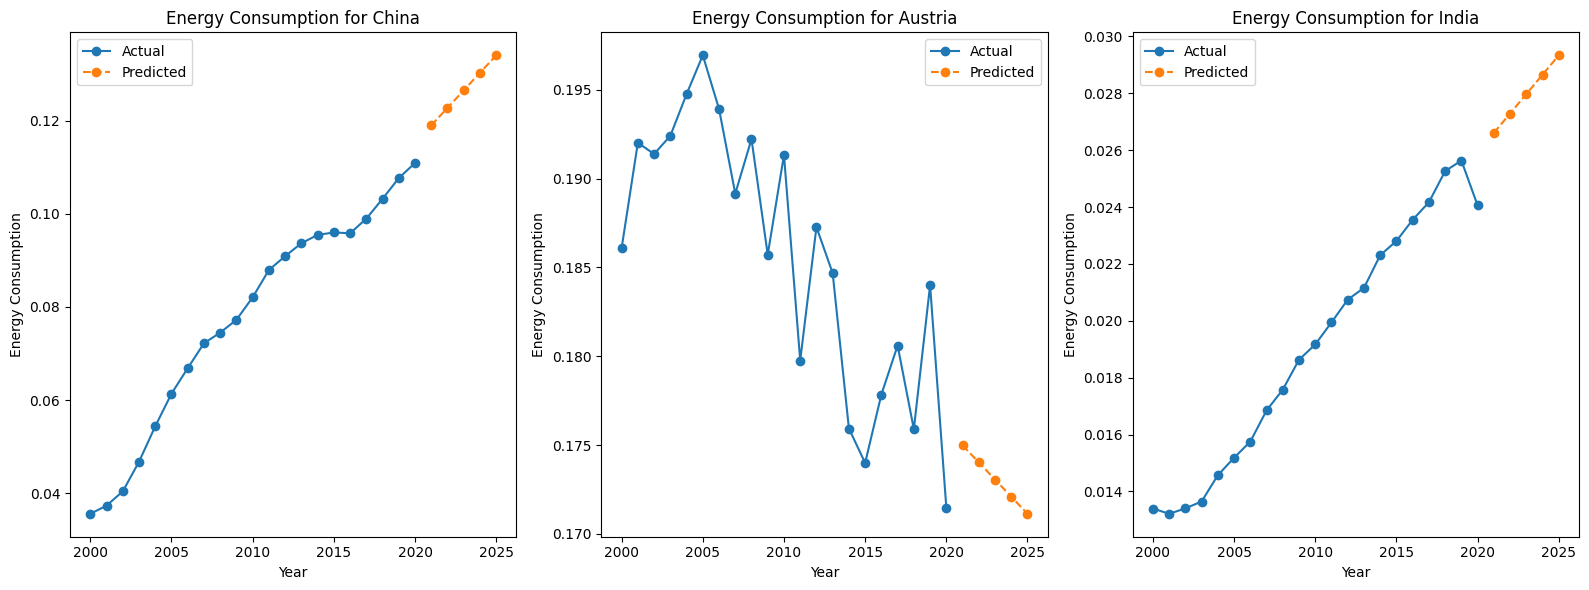

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

countries = ['China', 'Austria', 'India']

plt.figure(figsize=(16, 6))

for i, country in enumerate(countries, 1):
    country_data = b[b['Entity'] == country]

    X = country_data[['Year']]
    y_energy = country_data['Primary energy consumption per capita (kWh/person)']

    model_energy = LinearRegression().fit(X, y_energy)

    future_years = pd.DataFrame({'Year': range(2021, 2026)})
    predicted_energy = model_energy.predict(future_years[['Year']])

    plt.subplot(1, len(countries), i)
    plt.plot(country_data['Year'], y_energy, label='Actual', marker='o')
    plt.plot(future_years['Year'], predicted_energy, label='Predicted', marker='o', linestyle='--')
    plt.title(f'Energy Consumption for {country}')
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    plt.legend()

plt.tight_layout()
plt.show()

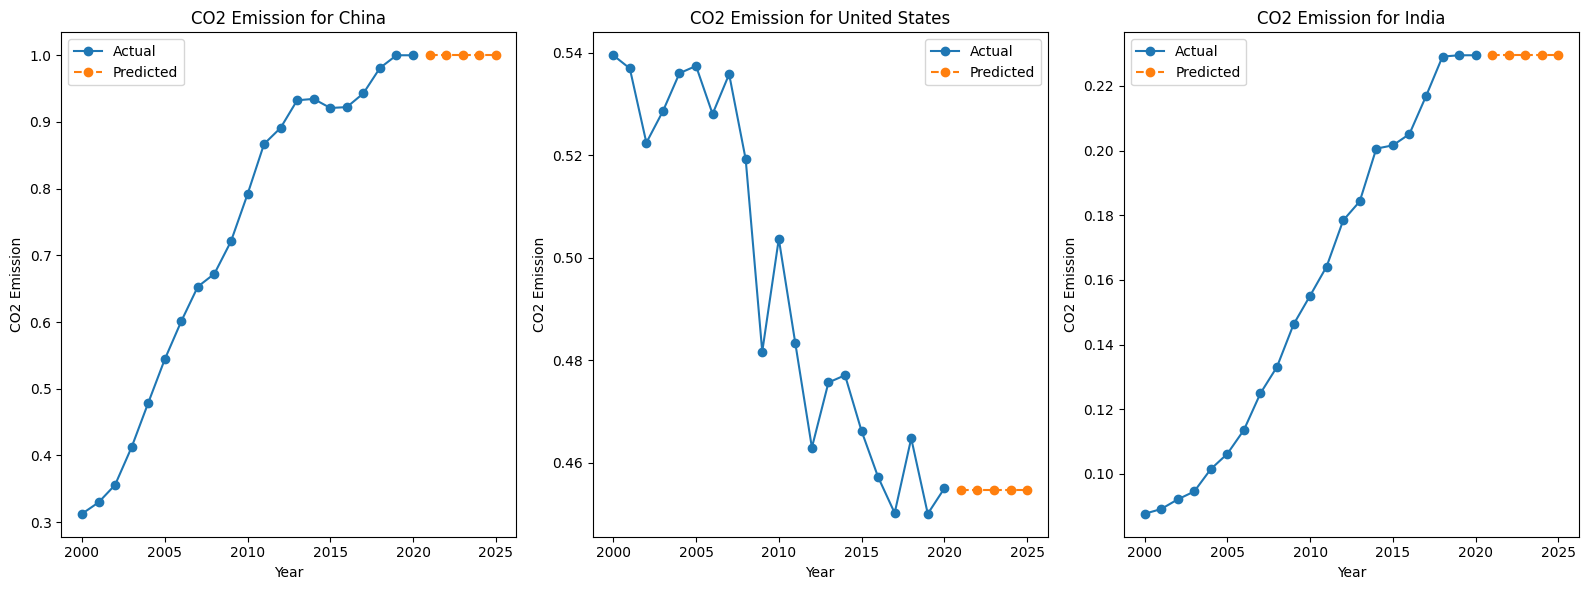

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

countries = ['China', 'United States', 'India']

plt.figure(figsize=(16, 6))

for i, country in enumerate(countries, 1):
    country_data = a[a['Entity'] == country]

    X = country_data[['Year']]
    y_co2 = country_data['Value_co2_emissions_kt_by_country']

    model_co2 = GradientBoostingRegressor().fit(X, y_co2)

    future_years = pd.DataFrame({'Year': range(2021, 2026)})
    predicted_co2 = model_co2.predict(future_years[['Year']])

    plt.subplot(1, len(countries), i)
    plt.plot(country_data['Year'], y_co2, label='Actual', marker='o')
    plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
    plt.title(f'CO2 Emission for {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission')
    plt.legend()

plt.tight_layout()
plt.show()

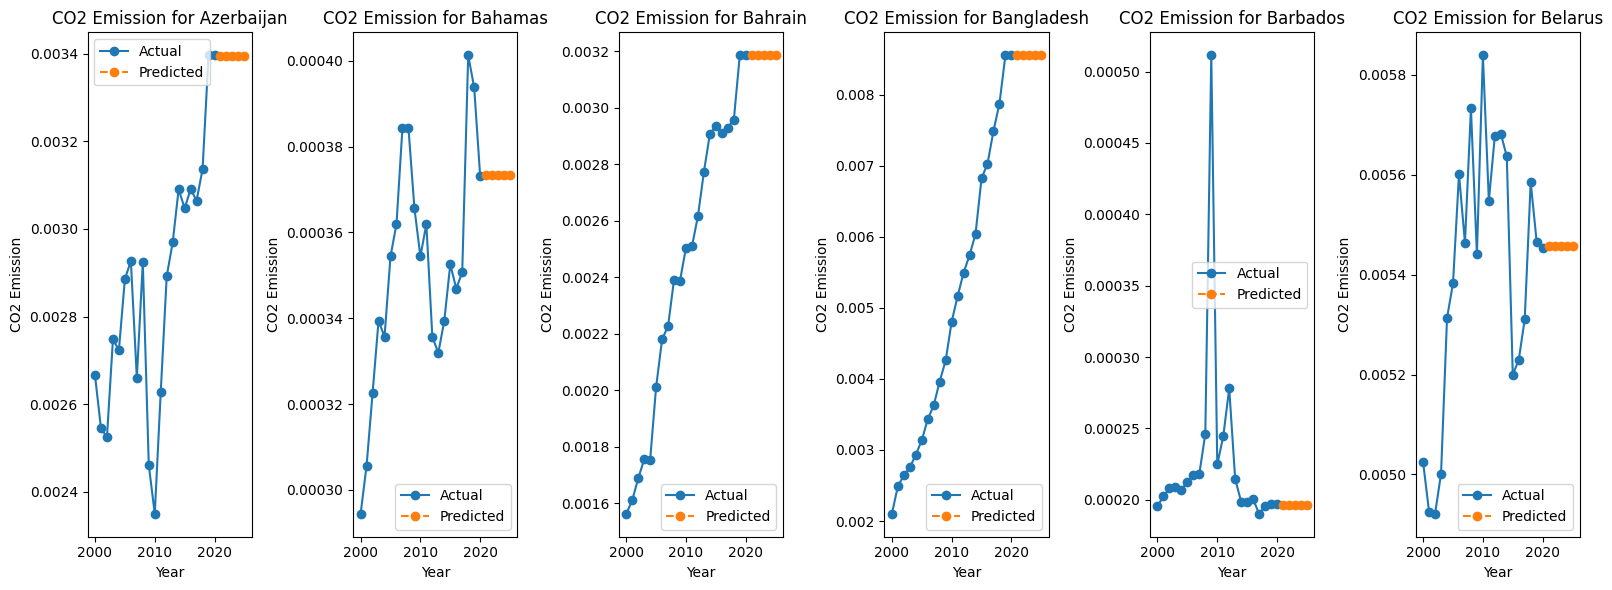

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# countries = ['Afghanistan', 'Argentina', 'Aruba', 'Australia', 'Austria']
countries= ['Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus']
plt.figure(figsize=(16, 6))

for i, country in enumerate(countries, 1):
    country_data = a[a['Entity'] == country]

    X = country_data[['Year']]
    y_co2 = country_data['Value_co2_emissions_kt_by_country']

    model_co2 = GradientBoostingRegressor().fit(X, y_co2)

    future_years = pd.DataFrame({'Year': range(2021, 2026)})
    predicted_co2 = model_co2.predict(future_years[['Year']])

    plt.subplot(1, len(countries), i)
    plt.plot(country_data['Year'], y_co2, label='Actual', marker='o')
    plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
    plt.title(f'CO2 Emission for {country}')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emission')
    plt.legend()

plt.tight_layout()
plt.show()

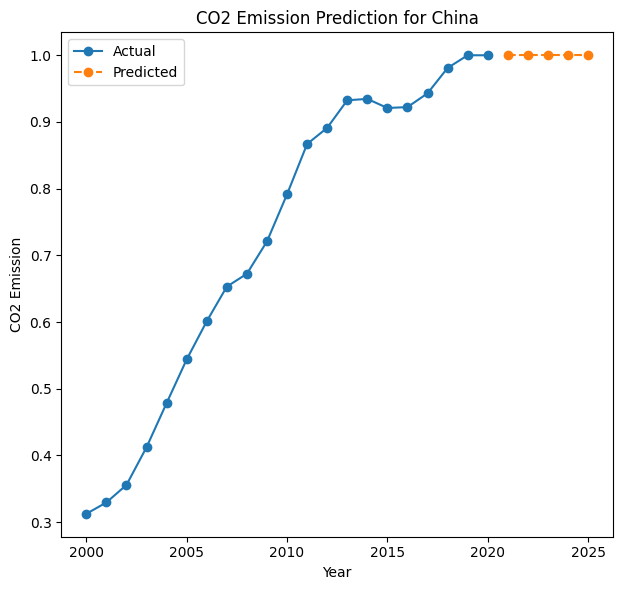

In [ ]:
import matplotlib.pyplot as plt

a= data.copy()
china_data = a[a['Entity'] == 'China']

X = china_data[['Year']]
y_co2 = china_data['Value_co2_emissions_kt_by_country']

# Fit linear regression models
model_co2 = GradientBoostingRegressor().fit(X, y_co2)

# Predict CO2 emission and energy consumption for the years 2021 to 2025
future_years = pd.DataFrame({'Year': range(2021, 2026)})
predicted_co2 = model_co2.predict(future_years[['Year']])


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], y_co2, label='Actual', marker='o')
plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

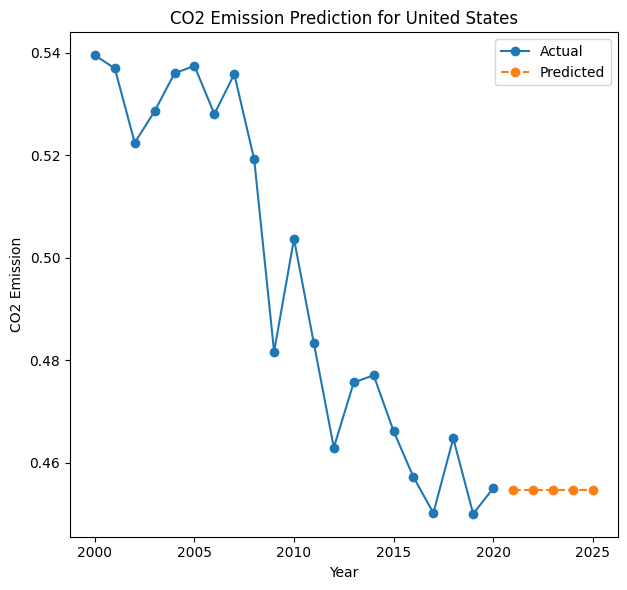

In [ ]:
import matplotlib.pyplot as plt

china_data = a[a['Entity'] == 'United States']

X = china_data[['Year']]
y_co2 = china_data['Value_co2_emissions_kt_by_country']

model_co2 = GradientBoostingRegressor().fit(X, y_co2)

# Predict CO2 emission and energy consumption for the years 2021 to 2025
future_years = pd.DataFrame({'Year': range(2021, 2026)})
predicted_co2 = model_co2.predict(future_years[['Year']])


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], y_co2, label='Actual', marker='o')
plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for United States')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

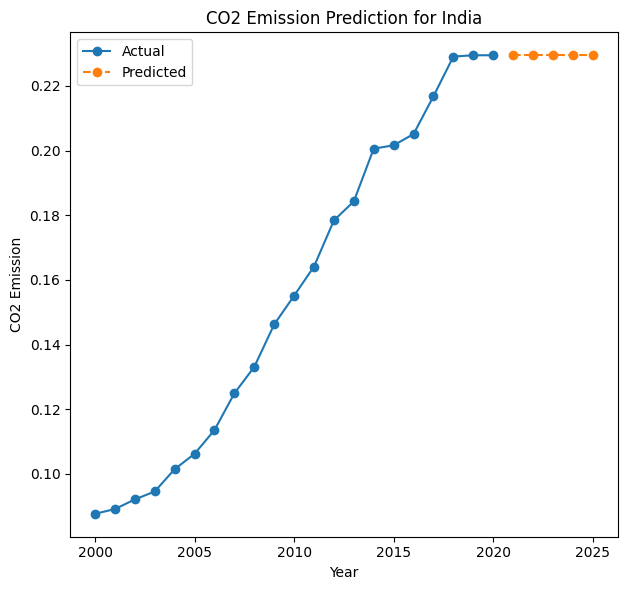

In [ ]:
import matplotlib.pyplot as plt

china_data = a[a['Entity'] == 'India']
X = china_data[['Year']]
y_co2 = china_data['Value_co2_emissions_kt_by_country']

model_co2 = GradientBoostingRegressor().fit(X, y_co2)

# Predict CO2 emission and energy consumption for the years 2021 to 2025
future_years = pd.DataFrame({'Year': range(2021, 2026)})
predicted_co2 = model_co2.predict(future_years[['Year']])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], y_co2, label='Actual', marker='o')
plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for India')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

# **Extrapolating the data**

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))

In [ ]:
data_ex= data.copy()
d = data_ex

import pandas as pd

countries = ['China', 'United States']
condition = (d['Entity'].isin(countries)) & (d['Year'] == 2020)

# Extrapolate
extrapolated_values = d.loc[condition, 'Value_co2_emissions_kt_by_country'].interpolate(
    method="linear", fill_value="extrapolate", limit_direction="both"
)

# Update the DataFrame with extrapolated values
d.loc[condition, 'Value_co2_emissions_kt_by_country'] = extrapolated_values

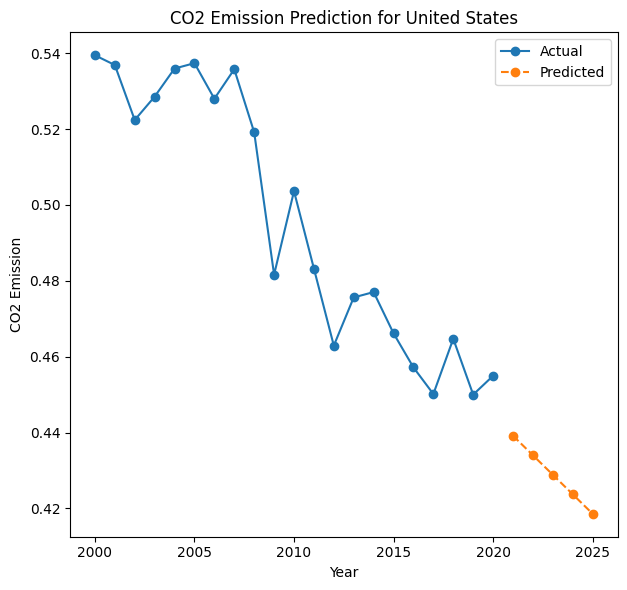

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

china_data = d[d['Entity'] == 'United States']
X = china_data[['Year']]
y_co2 = china_data['Value_co2_emissions_kt_by_country']

model_co2 = LinearRegression().fit(X, y_co2)

# Predict CO2 emission and energy consumption for the years 2021 to 2025
future_years = pd.DataFrame({'Year': range(2021, 2026)})
predicted_co2 = model_co2.predict(future_years[['Year']])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], y_co2, label='Actual', marker='o')
plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for United States')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

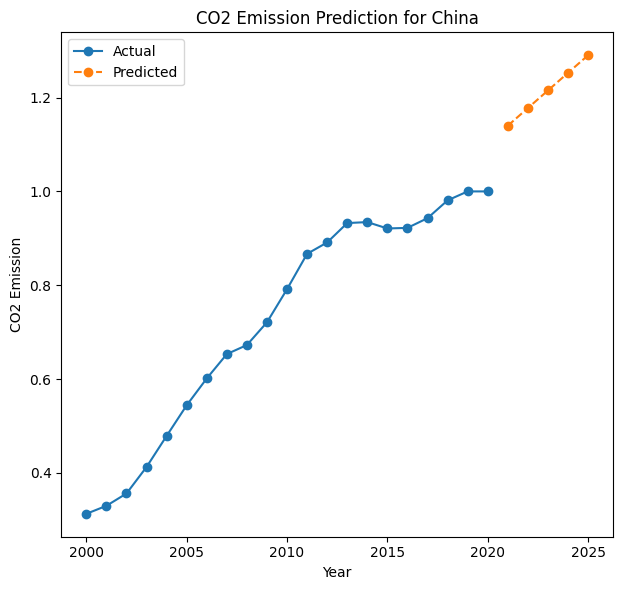

In [ ]:
import matplotlib.pyplot as plt

china_data = d[d['Entity'] == 'China']
X = china_data[['Year']]
y_co2 = china_data['Value_co2_emissions_kt_by_country']

model_co2 = LinearRegression().fit(X, y_co2)

# Predict CO2 emission and energy consumption for the years 2021 to 2025
future_years = pd.DataFrame({'Year': range(2021, 2026)})
predicted_co2 = model_co2.predict(future_years[['Year']])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(china_data['Year'], y_co2, label='Actual', marker='o')
plt.plot(future_years['Year'], predicted_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emission Prediction for China')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.legend()

plt.tight_layout()
plt.show()

# **Prophet model**

In [ ]:
#### prophet

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiq1rhtv/6rfgbruw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiq1rhtv/0h1v7581.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64543', 'data', 'file=/tmp/tmpqiq1rhtv/6rfgbruw.json', 'init=/tmp/tmpqiq1rhtv/0h1v7581.json', 'output', 'file=/tmp/tmpqiq1rhtv/prophet_modelyj1emnf2/prophet_model-20240118213759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:37:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:37:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:

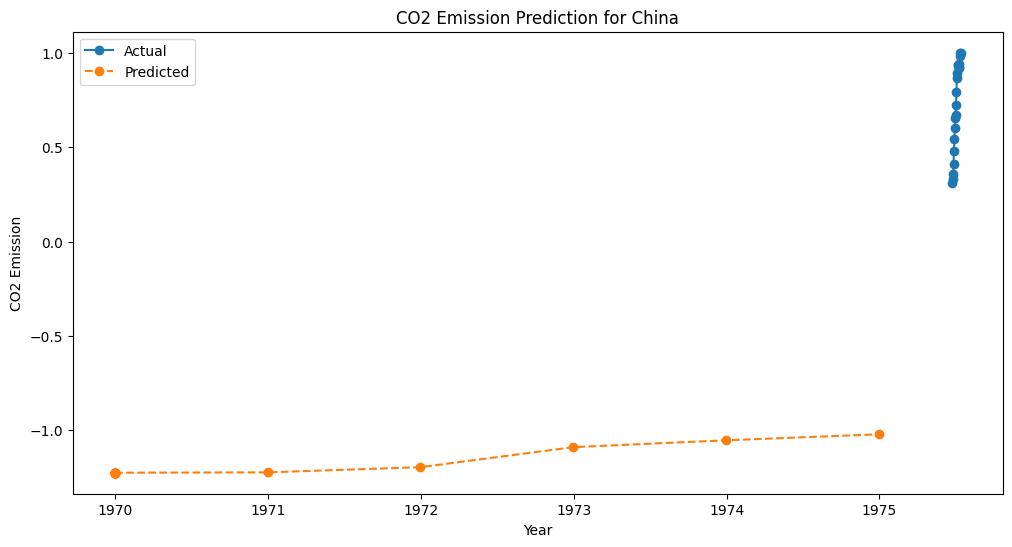

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for China and the years 2000 to 2020
china_data = a[a['Entity'] == 'China']

# Prepare the DataFrame in the required format for Prophet
prophet_df = china_data.rename(columns={'Year': 'ds', 'Value_co2_emissions_kt_by_country': 'y'})
prophet_df = prophet_df[['ds', 'y']]

# Create a Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for prediction
future = model.make_future_dataframe(periods=5, freq='Y')

# Predictions
forecast = model.predict(future)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting actual data
ax.plot(china_data['Year'], prophet_df['y'], label='Actual', marker='o')

# Plotting predicted data
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', linestyle='--', marker='o')

ax.set_title('CO2 Emission Prediction for China')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emission')
ax.legend()

plt.show()

NameError: name 'future_data' is not defined

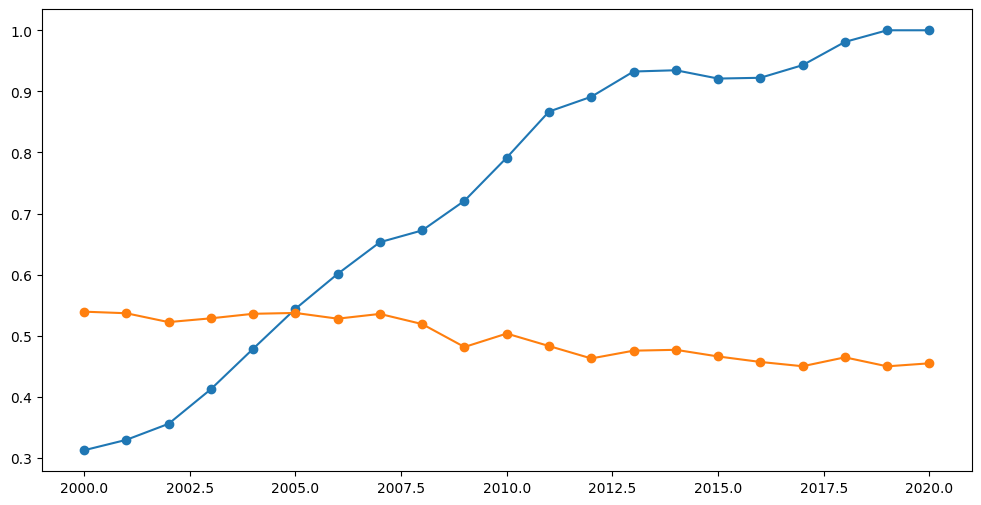

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the original data loaded in 'df'
years_original_data = data['Year'].unique()

# Plot the original data for selected countries
selected_countries = ['China', 'United States']


# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the original data
for country in selected_countries:
    original_data_country = data[(data['Entity'] == country) & (data['Year'].isin(years_original_data))]
    plt.plot(original_data_country['Year'], original_data_country['Value_co2_emissions_kt_by_country'], marker='o', label=f'Original Data ({country})')

# Plot the predicted data for selected countries (assuming future_data is already defined)
for country in selected_countries:
    predicted_data_country = future_data[future_data.index.get_level_values('Entity') == country]
    plt.plot(predicted_data_country.index.get_level_values('Year'), predicted_data_country['Predicted_Normalized_Value_co2_emissions'], marker='o', label=f'Predicted Carbon Emissions ({country})')

plt.title('Predicted Carbon Emissions for 2021-2025')
plt.xlabel('Year')
plt.ylabel('Normalized_Value_co2_emissions_kt_by_country')
plt.legend()
plt.grid(True)
plt.show()